# Initial EDA

### Basic Libraries

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Datasets

In [104]:
peptides_df = pd.read_csv('../data/train_peptides.csv')
peptides_df.set_index(["patient_id", "visit_month"], inplace = True)

proteins_df = pd.read_csv('../data/train_proteins.csv')
proteins_df.set_index(["patient_id", "visit_month"], inplace = True)

clinical_data_df = pd.read_csv('../data/train_clinical_data.csv')
clinical_data_df.set_index(["patient_id", "visit_month"], inplace = True)

supplemental_clinical_data_df = pd.read_csv('../data/supplemental_clinical_data.csv')
supplemental_clinical_data_df.set_index(["patient_id", "visit_month"], inplace = True)

clinical_data_df = pd.concat([clinical_data_df, supplemental_clinical_data_df])

(2615, 6)
(2223, 6)


(4838, 6)

### Creating pivot tables to aggregate data by patient visit

In [110]:
protein_counts_visit = pd.pivot_table(data = proteins_df, index = ["patient_id", "visit_month"], columns = 'UniProt', values = 'NPX')

peptide_counts_visit = pd.pivot_table(data = peptides_df, index = ["patient_id", "visit_month"], columns = 'Peptide', values = 'PeptideAbundance')

patient_data_final = pd.concat([peptide_counts_visit, protein_counts_visit, clinical_data_df[["updrs_1", "updrs_2", "updrs_3", "updrs_4", "upd23b_clinical_state_on_medication"]]], axis = 1, join = 'outer')
patient_data_final.sort_index(axis = 0, level = ["patient_id", "visit_month"], inplace = True)
patient_data_final.rename(columns = {"upd23b_clinical_state_on_medication": "medication"}, inplace = True)
patient_data_final["medication"].fillna(0, inplace = True)
patient_data_final["medication"].replace({"Off": 1, "On": 1}, inplace = True)

patient_data_final.head(20)

AADDTWEPFASGK  \
patient_id visit_month                  
35         0                      NaN   
           36                     NaN   
55         0                8984260.0   
           3                      NaN   
           6                8279770.0   
           9                      NaN   
           12               8382390.0   
           18                     NaN   
           24                     NaN   
           30                     NaN   
           36              10671500.0   
           42                     NaN   
           48                     NaN   
           54                     NaN   
           60                     NaN   
75         0                      NaN   
           36                     NaN   
155        0                      NaN   
337        0                      NaN   
           36                     NaN   

                        AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K  \
patient_id visit_month                                                     
35         0                                                         NaN   
           36                                                        NaN   
55         0                                                     53855.6   
           3                                                         NaN   
           6                                                     45251.9   
           9                                                         NaN   
           12                                                    53000.9   
           18                                                        NaN   
           24                                                        NaN   
           30                                                        NaN   
           36                                                    58108.4   
           42                                                        NaN   
           48                                                        NaN   
           54                                                        NaN   
           60                                                        NaN   
75         0                                                         NaN   
           36                                                        NaN   
155        0                                                         NaN   
337        0                                                         NaN   
           36                                                        NaN   

                        AAFTEC(UniMod_4)C(UniMod_4)QAADK  AANEVSSADVK  \
patient_id visit_month                                                  
35         0                                         NaN          NaN   
           36                                        NaN          NaN   
55         0                                   8579740.0          NaN   
           3                                         NaN          NaN   
           6                                   8655890.0      49927.5   
           9                                         NaN          NaN   
           12                                  8995640.0      45519.2   
           18                                        NaN          NaN   
           24                                        NaN          NaN   
           30                                        NaN          NaN   
           36                                  9985420.0      52374.0   
           42                                        NaN          NaN   
           48                                        NaN          NaN   
           54                                        NaN          NaN   
           60                                        NaN          NaN   
75         0                                         NaN          NaN   
           36                                        NaN          NaN   
155        0                                         NaN     

### Distribution of UPDRS Scores

Text(0.5, 1.0, 'Score Distribution for UPDRS Category 4')

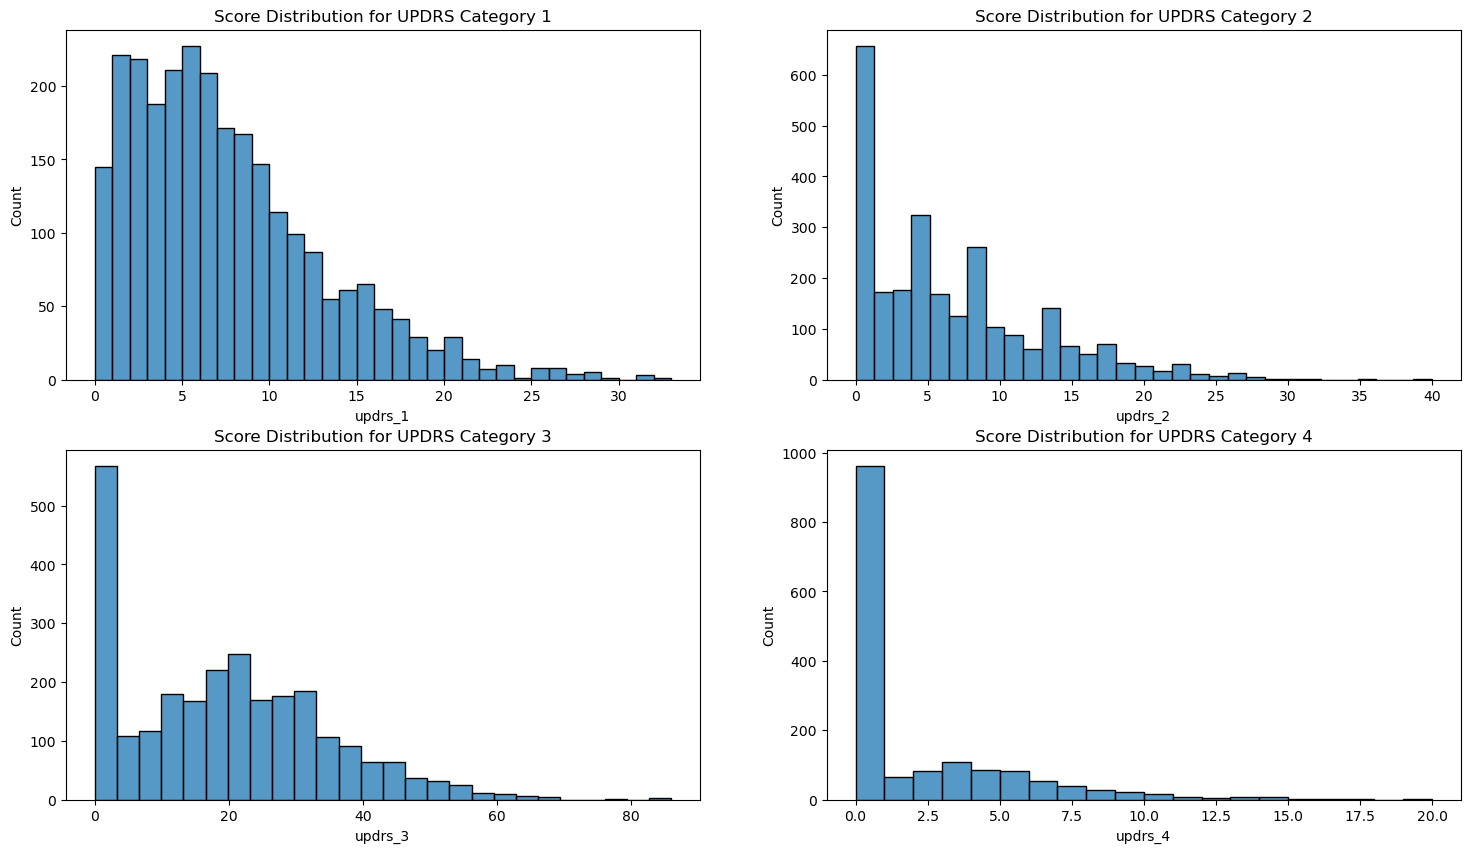

In [69]:
fig_updrs, axs_updrs = plt.subplots(2, 2, figsize = (18,10))

# updrs_1
sns.histplot(ax = axs_updrs[0, 0], data = clinical_data_df, x = 'updrs_1', stat = 'count')
axs_updrs[0, 0].set_title('Score Distribution for UPDRS Category 1')

# updrs_2
sns.histplot(ax = axs_updrs[0, 1], data = clinical_data_df, x = 'updrs_2', stat = 'count')
axs_updrs[0, 1].set_title('Score Distribution for UPDRS Category 2')

# updrs_3
sns.histplot(ax = axs_updrs[1, 0], data = clinical_data_df, x = 'updrs_3', stat = 'count')
axs_updrs[1, 0].set_title('Score Distribution for UPDRS Category 3')

# updrs_4
sns.histplot(ax = axs_updrs[1, 1], data = clinical_data_df, x = 'updrs_4', stat = 'count', binwidth = 1)
axs_updrs[1, 1].set_title('Score Distribution for UPDRS Category 4')


## Some basic regression models

### scikit-learn imports

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

## PyTorch imports